In [56]:
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
from matplotlib import pyplot as plt
from scipy.sparse import coo_matrix
import cantera as ct
import timeit

# Rate equation plots

In [83]:
gas=ct.Solution("h2o2.cti")
print(gas.n_species)
print(gas.n_reactions)
print(gas.species_names)
print(np.where([spec == 'AR' for spec in gas.species_names]))
print(np.where([spec == 'O2' for spec in gas.species_names]))
print(np.where([spec == 'H2' for spec in gas.species_names]))
print(np.where([spec == 'H2O' for spec in gas.species_names]))

9
28
['H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'AR']
(array([8]),)
(array([3]),)
(array([0]),)
(array([5]),)


In [84]:
gas=ct.Solution("gri30.cti")
print(gas.n_species)
print(gas.n_reactions)
print(gas.species_names)
print(np.where([spec == 'N2' for spec in gas.species_names]))
print(np.where([spec == 'O2' for spec in gas.species_names]))
print(np.where([spec == 'CH4' for spec in gas.species_names]))
print(np.where([spec == 'H2O' for spec in gas.species_names]))

53
325
['H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'C', 'CH', 'CH2', 'CH2(S)', 'CH3', 'CH4', 'CO', 'CO2', 'HCO', 'CH2O', 'CH2OH', 'CH3O', 'CH3OH', 'C2H', 'C2H2', 'C2H3', 'C2H4', 'C2H5', 'C2H6', 'HCCO', 'CH2CO', 'HCCOH', 'N', 'NH', 'NH2', 'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'CN', 'HCN', 'H2CN', 'HCNN', 'HCNO', 'HOCN', 'HNCO', 'NCO', 'N2', 'AR', 'C3H7', 'C3H8', 'CH2CHO', 'CH3CHO']
(array([47]),)
(array([3]),)
(array([13]),)
(array([5]),)


In [85]:
gas=ct.Solution("mechanisms/ethylene.cti")
print(gas.n_species)
print(gas.n_reactions)
print(gas.species_names)
print(np.where([spec == 'N2' for spec in gas.species_names]))
print(np.where([spec == 'O2' for spec in gas.species_names]))
print(np.where([spec == 'C2H4' for spec in gas.species_names]))
print(np.where([spec == 'H2O' for spec in gas.species_names]))


84
1698
['HE', 'AR', 'N2', 'O2', 'H2', 'H2O', 'H2O2', 'CO', 'CO2', 'CH2O', 'CH4', 'CH3OH', 'CH3OOH', 'C2H2', 'CH2CO', 'C2H2O2', 'C2H4', 'C2H4O', 'CH3CHO', 'C2H4O2', 'C2-OQOOH', 'C2H6', 'C2H5OH', 'C2H5OOH', 'C3H2', 'AC3H4', 'PC3H4', 'C2H3CHO', 'C3H6', 'CH3COCH3', 'C3H6O', 'C2H5CHO', 'C3H8', 'C4H2', 'C4H4', 'C4H6', 'IC4H8', 'NC4H8', 'CYC5H4O', 'CYC5H6', 'C6H6', 'MCPTD', 'C10H8', 'O', 'H', 'OH', 'HO2', 'C', 'CH', 'HCO', 'CH2', 'CH2S', 'CH3', 'CH3O', 'CH2OH', 'CH3OO', 'C2H', 'HCCO', 'C2H3', 'CH3CO', 'CH2CHO', 'C2H5', 'CH3CHOH', 'C2H4OH', 'C2H5OO', 'C2-QOOH', 'C2-OOQOOH', 'C3H3', 'CH2CCH3', 'CH2CHCH2', 'CHCHCH3', 'RALD3B', 'RALD3G', 'CH3COCH2', 'IC3H7', 'NC3H7', 'C4H3', 'C4H5', 'SC4H7', 'IC4H7', 'CH2C3H5', 'CYC5H5', 'C5H5O', 'C6H5']
(array([2]),)
(array([3]),)
(array([16]),)
(array([5]),)


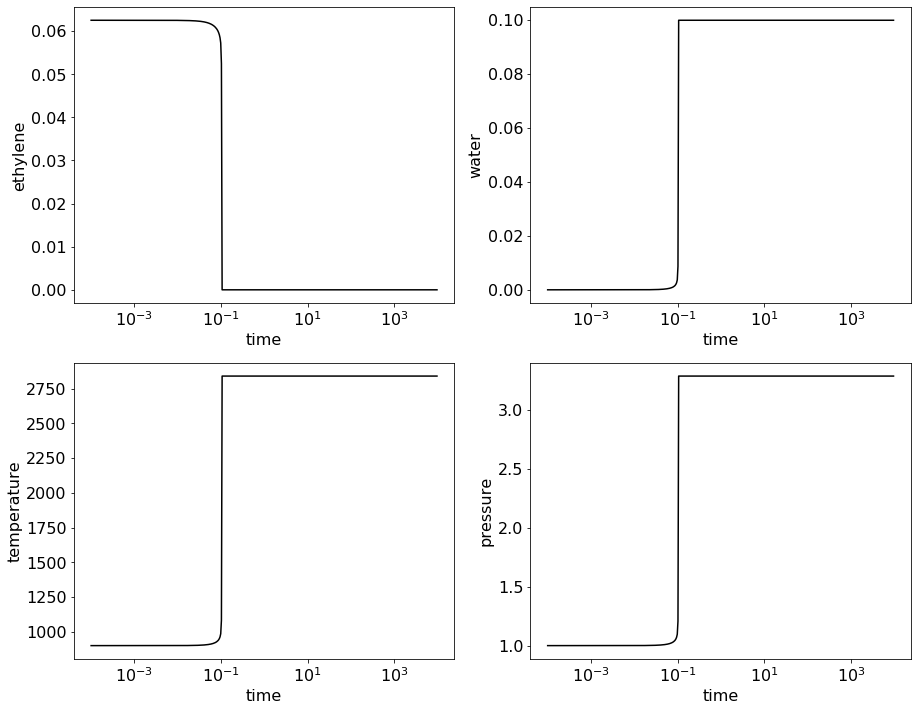

In [66]:
filebase='data/ethylene'
concentrations=np.load(filebase+"concentrations.npy");
times=np.load(filebase+"times.npy");
temperatures=np.load(filebase+"temperatures.npy");
pressures=np.load(filebase+"pressures.npy");
matrices=np.load(filebase+"matrices.npy")
evals=np.load(filebase+"eigenvalues.npy")
evecs=np.load(filebase+"eigenvectors.npy")
fig, ax = plt.subplots(2, 2,figsize=(15,12))
ax[0,0].semilogx(times,concentrations[:,16], "-", label="infinity", color="black")
ax[0,0].set_xlabel("time")
ax[0,0].set_ylabel("ethylene")
ax[0,1].semilogx(times,concentrations[:,5], "-", label="infinity", color="black")
ax[0,1].set_xlabel("time")
ax[0,1].set_ylabel("water")

ax[1,0].semilogx(times,temperatures, "-", label="infinity", color="black")
ax[1,0].set_xlabel("time")
ax[1,0].set_ylabel("temperature")
ax[1,1].semilogx(times,pressures, "-", label="infinity", color="black")
ax[1,1].set_xlabel("time")
ax[1,1].set_ylabel("pressure")
plt.savefig("ethyleneignition.pdf")

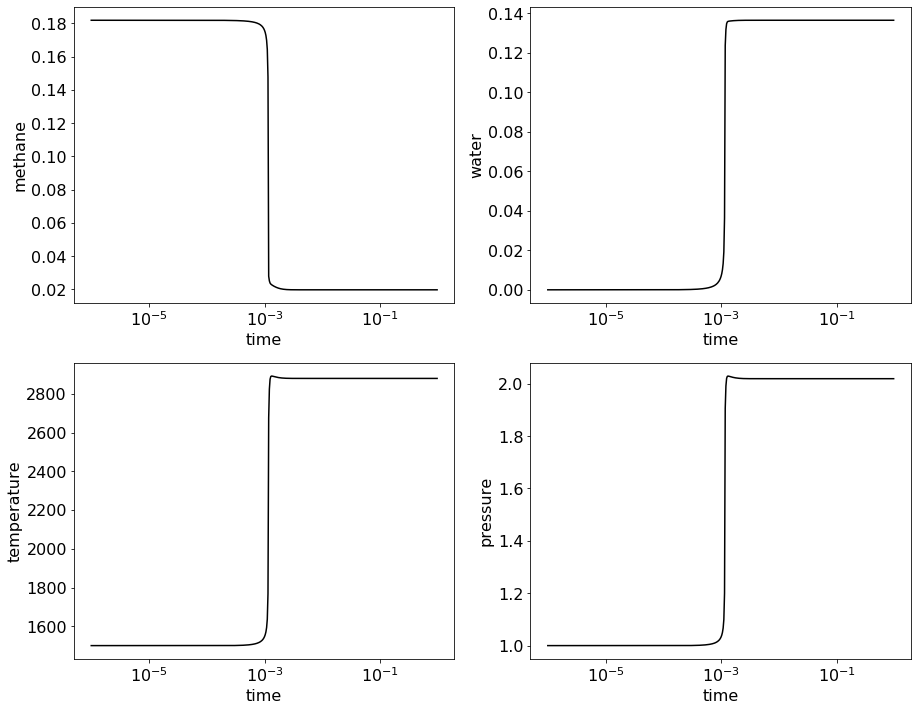

In [130]:
filebase='data/methane'
concentrations=np.load(filebase+"concentrations.npy");
times=np.load(filebase+"times.npy");
temperatures=np.load(filebase+"temperatures.npy");
pressures=np.load(filebase+"pressures.npy");
matrices=np.load(filebase+"matrices.npy")
evals=np.load(filebase+"eigenvalues.npy")
evecs=np.load(filebase+"eigenvectors.npy")
norms=np.load(filebase+"norms.npy")
fig, ax = plt.subplots(2, 2,figsize=(15,12))
ax[0,0].semilogx(times,concentrations[:,3], "-", label="infinity", color="black")
ax[0,0].set_xlabel("time")
ax[0,0].set_ylabel("methane")
ax[0,1].semilogx(times,concentrations[:,5], "-", label="infinity", color="black")
ax[0,1].set_xlabel("time")
ax[0,1].set_ylabel("water")

ax[1,0].semilogx(times,temperatures, "-", label="infinity", color="black")
ax[1,0].set_xlabel("time")
ax[1,0].set_ylabel("temperature")
ax[1,1].semilogx(times,pressures, "-", label="infinity", color="black")
ax[1,1].set_xlabel("time")
ax[1,1].set_ylabel("pressure")
plt.savefig("griignition.pdf")

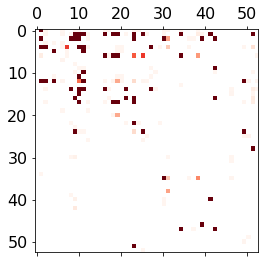

In [131]:
cmap = plt.cm.get_cmap("Reds")
cmap.set_under("white")
mean=np.mean(matrices)
plt.matshow(matrices[0], cmap=cmap, vmin=1, vmax=mean)

In [55]:
cmap = plt.cm.get_cmap("Reds")
cmap.set_under("white")
mean=np.mean(matrices)
for n in range(len(evals)):
    plt.matshow(matrices[n], cmap=cmap, vmin=1, vmax=mean)
    plt.colorbar()
    plt.savefig('matrix/'+str(n).zfill(4)+'.png',bbox_inches='tight')
    plt.close()
    print(n*1.0/len(evecs), end="\t\r")

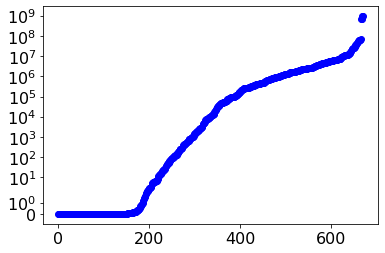

In [132]:
plt.plot(np.sort(matrices[-1][np.where(matrices[-1]>0)]), 'bo')
plt.yscale('symlog')
plt.ylim=(0,np.max(matrices))

In [133]:
for n in range(len(matrices)):
    plt.semilogy(np.sort(matrices[n][np.where(matrices[n]>0)]), 'bo')
    plt.yscale('symlog')
    plt.ylim=(0,np.max(matrices))
    plt.savefig('distribution/'+str(n).zfill(4)+'.png',bbox_inches='tight')
    plt.close()
    print(n*1.0/len(evecs), end="\t\r")

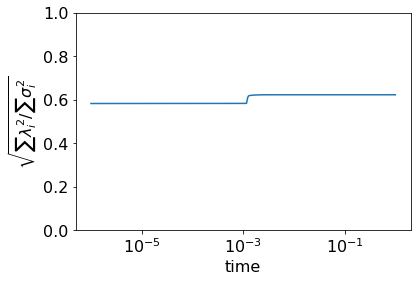

In [134]:
fig,ax=plt.subplots(1,1)
ax.semilogx(times,norms)
ax.set_ylim(0,1)
ax.set_xlabel("time")
ax.set_ylabel("$\sqrt{ \sum \lambda_i^2 / \sum \sigma_i^2 }$")
plt.savefig("normality.pdf",bbox_inches='tight')

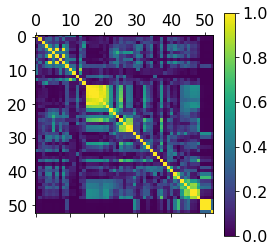

In [135]:
cmap = plt.cm.get_cmap("Reds")
cmap.set_under("white")
angles=np.abs(np.conjugate(np.transpose(evecs[0])).dot(evecs[0]))
mean=np.mean(angles)
plt.matshow(angles,vmin=0,vmax=1)
plt.colorbar()

In [136]:
cmap = plt.cm.get_cmap("Reds")
cmap.set_under("white")
mean=np.mean(matrices)
for n in range(len(evecs)):
    angles=np.abs(np.conjugate(np.transpose(evecs[n])).dot(evecs[n]))
    plt.matshow(angles,vmin=0,vmax=1)
    plt.colorbar()
    plt.savefig('angles/'+str(n).zfill(4)+'.png',bbox_inches='tight')
    plt.close()
    print(n*1.0/len(evecs), end="\t\r")

Text(0, 0.5, '$\\omega_i$')

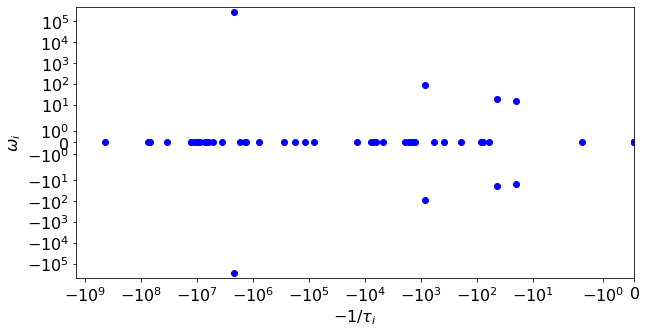

In [143]:
fig,ax=plt.subplots(1,1, figsize=(10,5))
ax.plot(np.real(evals[250]),np.imag(evals[250]),'bo')
ax.set_xscale('symlog')
ax.set_yscale('symlog')
ax.set_xlim(1.1*np.min(np.real(evals)),0)
ax.set_ylim(1.1*np.min(np.imag(evals)),1.1*np.max(np.imag(evals)))
ax.set_xlabel(r"$-1/\tau_i$")
ax.set_ylabel(r"$\omega_i$")

In [145]:
start=timeit.default_timer()
for n in range(len(evals)):
    fig,ax=plt.subplots(1,1, figsize=(10,5))
    ax.plot(np.real(evals[n]),np.imag(evals[n]),'bo')
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_xlim(1.1*np.min(np.real(evals)),0)
    ax.set_ylim(1.1*np.min(np.imag(evals)),1.1*np.max(np.imag(evals)))
    ax.set_xlabel(r"$-1/\tau_i$")
    ax.set_ylabel(r"$\omega_i$")
    plt.savefig('spectrum1/'+str(n).zfill(4)+'.png',bbox_inches='tight')
    plt.close()
    print(n*1.0/len(evals), end='\t\r')
stop=timeit.default_timer()
print("\n runtime %f"%(stop-start))

0.998	
 runtime 442.443900


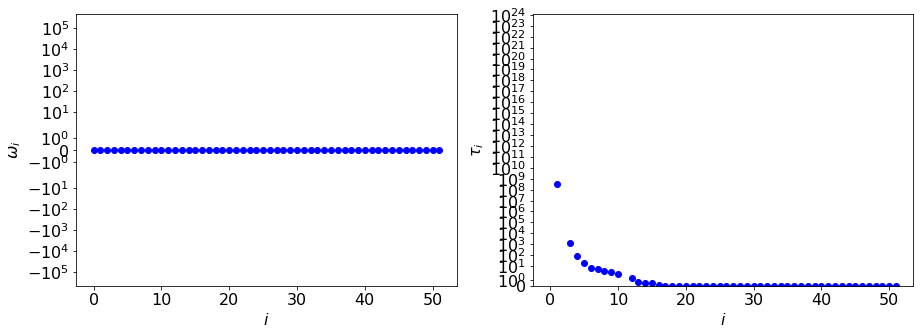

In [140]:
fig,ax=plt.subplots(1,2,figsize=(15, 5))
ax[1].plot(np.arange(len(evals[70,1:])),-1/np.real(evals[70,1:]), 'bo')
ax[1].set_ylim(1e-12,-1/np.max(np.real(evals[np.where(np.real(evals)<0)])))
ax[1].set_yscale('symlog')
ax[1].set_xlabel('$i$')
ax[1].set_ylabel(r"$\tau_i$");
ax[0].plot(np.arange(len(evals[70,1:])),np.imag(evals[70,1:]), 'bo')
ax[0].set_yscale('symlog')
ax[0].set_ylim(np.min(np.imag(evals)),np.max(np.imag(evals)))
ax[0].set_xlabel('$i$')
ax[0].set_ylabel(r"$\omega_i$");

In [141]:
start=timeit.default_timer()

for n in range(len(evals)):
    fig,ax=plt.subplots(1,2,figsize=(15, 5))
    ax[1].plot(np.arange(len(evals[n,1:])),-1/np.real(evals[n,1:]), 'bo')
    ax[1].set_yscale('symlog')
    ax[1].set_ylim(1e-12,-1/np.max(np.real(evals[np.where(np.real(evals)<0)])))
    ax[1].set_xlabel('$i$')
    ax[1].set_ylabel(r"$\tau_i$");
    ax[0].plot(np.arange(len(evals[n,1:])),np.imag(evals[n,1:]), 'bo')
    ax[0].set_ylim(np.min(np.imag(evals)),np.max(np.imag(evals)))
    ax[0].set_yscale('symlog')
    ax[0].set_xlabel('$i$')
    ax[0].set_ylabel(r"$\omega_i$");
    plt.savefig('spectrum2/'+str(n).zfill(4)+'.png')
    plt.close()
    print(n*1.0/len(evals), end='\t\r')
stop=timeit.default_timer()
print("\n runtime %f"%(stop-start))

0.998	
 runtime 247.410012


# CME runtimes

In [88]:
nums=np.arange(7)+3
nums2=np.arange(6)+3

dims=np.loadtxt('questruntime/dim.dat')
sruntimes=np.loadtxt('questruntime/sruntime.dat')
cruntimes=np.loadtxt('questruntime/cruntime.dat')
eruntimes=np.loadtxt('questruntime/eruntimes.dat')
pruntimes=np.loadtxt('questruntime/pruntime.dat')


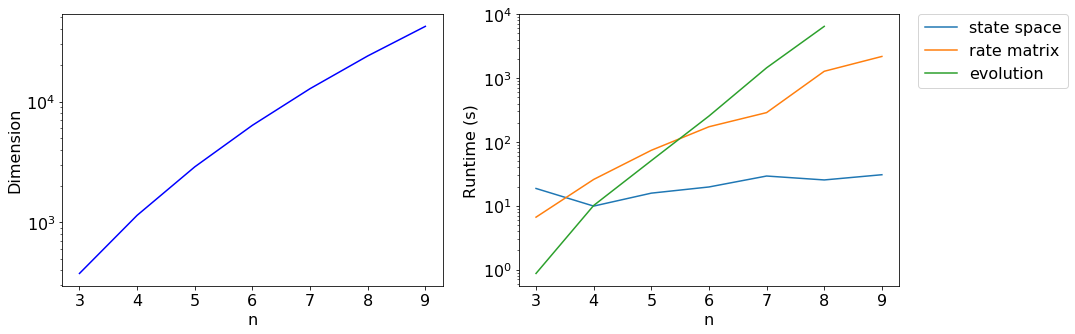

In [93]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.semilogy(nums,dims, 'b-')
plt.xlabel("n")
plt.ylabel("Dimension")
plt.subplot(122)
plt.semilogy(nums,sruntimes, label="state space")
plt.semilogy(nums,cruntimes, label="rate matrix")
# plt.semilogy(nums2,eruntimes, label="eigenvales")
plt.semilogy(nums2,pruntimes, label="evolution")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n")
plt.ylabel("Runtime (s)")
plt.savefig("runtimes.pdf")
plt.show()


In [94]:
a,b=np.polyfit(nums2,np.log(eruntimes),1)
[[n,np.exp(b+a*n)/3600] for n in range(3,11)]

[[3, 4.4987706042990506e-05],
 [4, 0.00015967898235648745],
 [5, 0.0005667632259808491],
 [6, 0.0020116645884371044],
 [7, 0.0071401852323223275],
 [8, 0.02534331291852331],
 [9, 0.08995333997480753],
 [10, 0.3192796221487356]]

# CME concentrations and thermo

In [96]:
filebase="data/h2o2/3/"
propogate=np.load(filebase+"propogate.npy")
temperatures=np.load(filebase+"temperatures.npy")
pressures=np.load(filebase+"pressures.npy")
times=np.load(filebase+"times.npy")
multiindices=np.load(filebase+"multiindices.npy")

spatoms=np.load(filebase+"spatoms.npy")

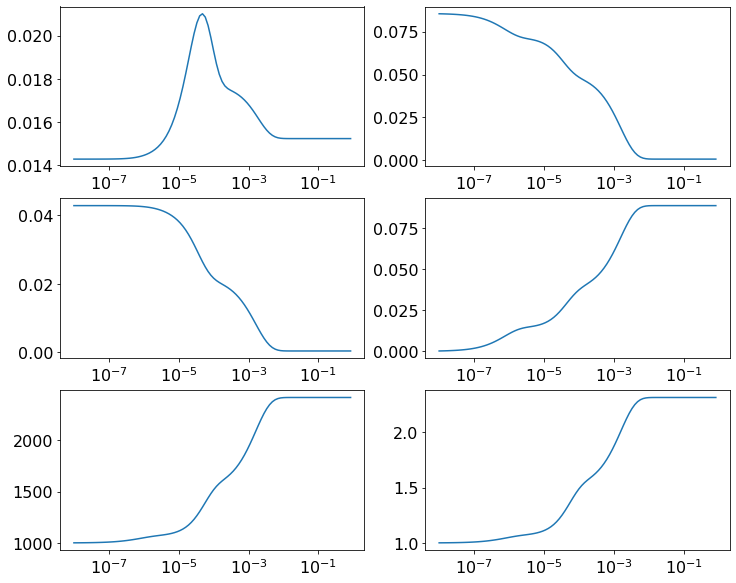

In [98]:
plt.figure(figsize=(12, 10))
plt.subplot(321)

plt.semilogx(times,np.sum(propogate.dot(np.diag((multiindices[:,1]+multiindices[:,2]+multiindices[:,4]+multiindices[:,6])/np.sum(multiindices,axis=1))),axis=1))
plt.subplot(322)
plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,0]/np.sum(multiindices,axis=1))),axis=1))
plt.subplot(323)
plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,3]/np.sum(multiindices,axis=1))),axis=1))
plt.subplot(324)
plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,5])/np.sum(multiindices,axis=1)),axis=1))
plt.subplot(325)
plt.semilogx(times,np.sum(propogate.dot(np.diag(temperatures)),axis=1))
plt.subplot(326)
plt.semilogx(times,np.sum(propogate.dot(np.diag(pressures)),axis=1))
plt.show()

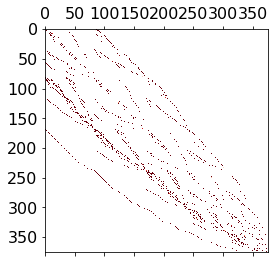

In [122]:
dim=len(multiindices)
rows=np.load(filebase+"rows.npy")
columns=np.load(filebase+"columns.npy")
data=np.load(filebase+"data.npy")
ratematrix=coo_matrix((np.array(data),(np.array(rows),np.array(columns))),(int(dim),int(dim)))
cmap = plt.cm.get_cmap("Reds")
cmap.set_under("white")
scale=np.mean(np.abs(ratematrix.toarray()[np.where(ratematrix.toarray()!=0)]))/1e6
plt.matshow(ratematrix.toarray(), vmin=1, vmax=scale, cmap=cmap)

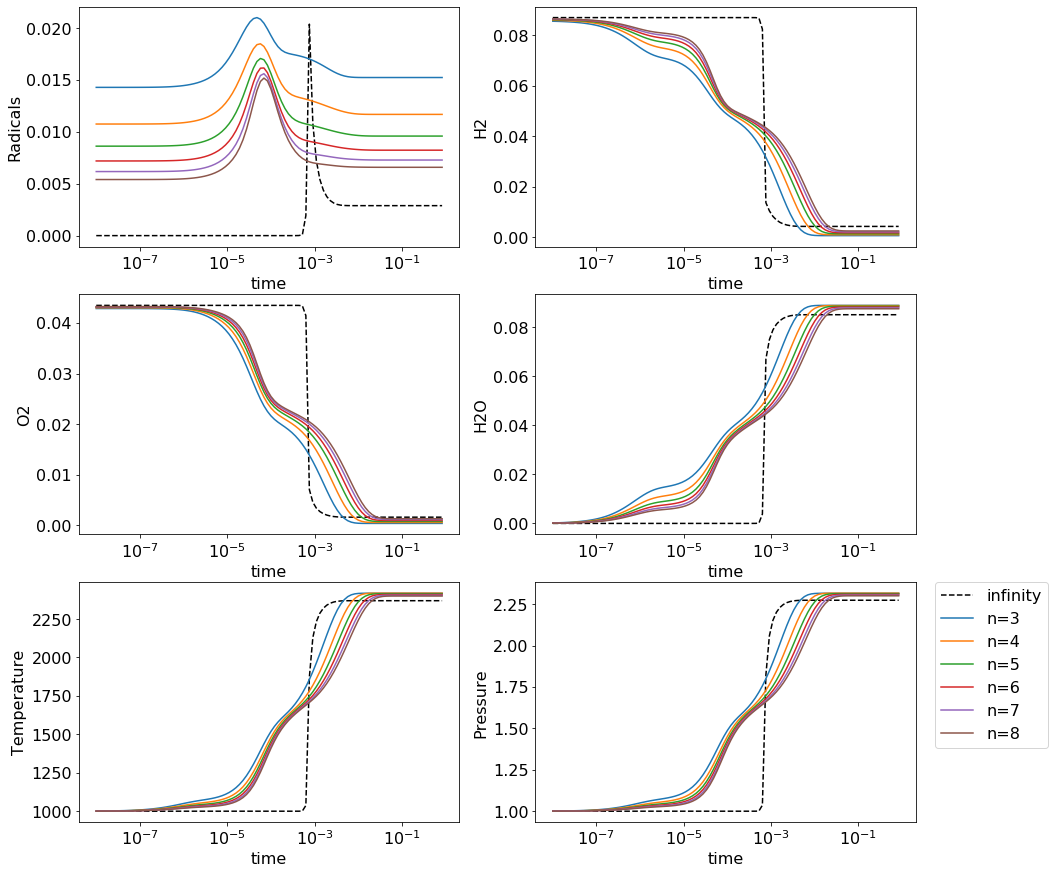

In [127]:
fig, ax = plt.subplots(3, 2,figsize=(15, 15))
concentrations=np.load("data/h2o2concentrations.npy");
times2=np.load("data/h2o2times.npy");
temperatures2=np.load("data/h2o2temperatures.npy");
pressures2=np.load("data/h2o2pressures.npy");

ax[0,0].set_xlabel("time")
ax[0,1].set_xlabel("time")
ax[1,0].set_xlabel("time")
ax[1,1].set_xlabel("time")
ax[2,0].set_xlabel("time")
ax[2,1].set_xlabel("time")

ax[0,0].set_ylabel("Radicals")
ax[0,1].set_ylabel("H2")
ax[1,0].set_ylabel("O2")
ax[1,1].set_ylabel("H2O")
ax[2,0].set_ylabel("Temperature")
ax[2,1].set_ylabel("Pressure")


ax[0,0].semilogx(times2,concentrations[:,1]+concentrations[:,2]+concentrations[:,4]+concentrations[:,6], "--", label="infinity", color="black")
ax[0,1].semilogx(times2,concentrations[:,0], "--", label="infinity", color="black")
ax[1,0].semilogx(times2,concentrations[:,3], "--", label="infinity", color="black")
ax[1,1].semilogx(times2,concentrations[:,5], "--", label="infinity", color="black")
ax[2,0].semilogx(times2,temperatures2, "--", label="infinity", color="black")
ax[2,1].semilogx(times2,pressures2, "--", label="infinity", color="black")


for n in range(3,9):
    filebase="data/h2o2/"+str(n)+"/"
    propogate=np.load(filebase+"propogate.npy")
    temperatures=np.load(filebase+"temperatures.npy")
    pressures=np.load(filebase+"pressures.npy")
    times=np.load(filebase+"times.npy")
    multiindices=np.load(filebase+"multiindices.npy")
    spatoms=np.load(filebase+"spatoms.npy")
    ax[0,0].semilogx(times,np.sum(propogate.dot(np.diag((multiindices[:,1]+multiindices[:,2]+multiindices[:,4]+multiindices[:,6])/np.sum(multiindices,axis=1))),axis=1),label="n="+str(n))
    ax[0,1].semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,0]/np.sum(multiindices,axis=1))),axis=1),label="n="+str(n))
    ax[1,0].semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,3]/np.sum(multiindices,axis=1))),axis=1),label="n="+str(n))
    ax[1,1].semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,5])/np.sum(multiindices,axis=1)),axis=1),label="n="+str(n))
    ax[2,0].semilogx(times,np.sum(propogate.dot(np.diag(temperatures)),axis=1),label="n="+str(n))
    ax[2,1].semilogx(times,np.sum(propogate.dot(np.diag(pressures)),axis=1),label="n="+str(n))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig("plots.pdf")